In [1]:
import pandas as pd
import regex
import seaborn as sns
from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon
#载入所需库

In [178]:
data = pd.read_csv('jobs.csv')
#读取数据
sns.set_style('darkgrid')
plt.rcParams['font.sans-serif']=['SimHei'] #指定中文字体

In [179]:
data

,信息ID,岗位链接,搜索岗位名,岗位名称,企业名称,薪资区间,工作地点,工作经验,学历要求,岗位介绍,其他待遇,企业经营范围
0,1,https://www.liepin.com/job/1935070701.shtml?d_...,Java开发,中级Java研发工程师,行云数聚(北京)科技有限公司,15-20k,北京,1-3年,统招本科,职责描述：\r\n（1）根据需求进行开发工作；\r\n（2）在现有的技术框架下提交合格的代码...,绩效奖金 五险一金 发展空间大 扁平管理 管理规范 技能培训 带薪年假 定期体检,一般项目：技术服务、技术开发、技术咨询、技术交流、技术转让、技术推广；非居住房地产租赁；数据...
1,2,https://www.liepin.com/job/1958453183.shtml?d_...,Java开发,基础平台开发工程师,欧科云链,30-60k·14薪,北京-海淀区,经验不限,统招本科,岗位职责\n\n1、负责集团全球一站式 DevOps 基础平台开发与交付，包括：敏捷开发、构...,年终奖金 发展空间大 节日礼物 远程办公 六险一金 团建费 健身津贴 学习津贴,计算机软硬件及网络技术开发、技术转让、技术咨询、技术服务、技术推广、技术培训；销售自行开发的...
2,3,https://www.liepin.com/job/1958621509.shtml?d_...,Java开发,软件开发工程师（前端）,中国移动(成都)产业研究院,薪资面议,成都,3-5年,统招本科,岗位职责：\n1、负责编写可靠的前端代码和相关设计、维护文档；\n\n2、负责维护系统中前端...,年终奖金 五险一金 管理规范 技能培训 岗位晋升 带薪年假,许可项目：旅游业务；认证服务；通用航空服务（依法须经批准的项目，经相关部门批准后方可开展经营...
3,4,https://www.liepin.com/job/1948537553.shtml?d_...,Java开发,Java开发工程师-XN-郑州,科大国创云网,8-12k,郑州-高新区,5-10年,本科,岗位职责：\n1、Java开发人员：主要产品需求开发，1人，需要具备2年以上Java开发经验...,五险一金 领导好 发展空间大 公司规模大 岗位晋升,一般项目：软件开发；软件销售；计算机软硬件及外围设备制造；技术服务、技术开发、技术咨询、技术...
4,5,https://www.liepin.com/job/1955642039.shtml?d_...,Java开发,高级Java开发工程师-【本地生活】,快手,30-50k·16薪,北京-海淀区,3-5年,学历不限,一、高级Java开发工程师（平台方向）-【本地生活】\n职位描述\n1、负责和参与快手本地生...,NaN,一般项目：计算机软硬件及辅助设备零售；网络技术服务；技术服务、技术开发、技术咨询、技术交流、...
...,...,...,...,...,...,...,...,...,...,...,...,...
1576,1577,https://www.liepin.com/job/1954293273.shtml?d_...,图像算法工程师,图像算法软件工程师,北京奥博泰科技有限公司,15-20k,北京-丰台区,1-3年,本科,岗位职责：\n1、基于机器视觉的动态、静态测量工程软件开发；\n2、光学测量行业最新图像处理...,五险一金 餐费补贴 通讯津贴 带薪年假 定期体检 年度旅游 交通补助 节日礼物,生产仪器仪表、照明设备；技术开发、技术服务、技术转让；销售仪器仪表、机械设备、电器设备；货物...
1577,1578,https://www.liepin.com/job/1954453275.shtml?d_...,图像算法工程师,图像算法工程师,中科精工,20-40k,深圳,3-5年,硕士,职位描述：\n1、负责图像处理算法开发（定位、缺陷检测、识别、测量）；\n2、负责深度学习和...,NaN,"一般经营项目是：通用自动化设备,电子产品,机电产品,机电仪器,自动化设备及零配件的研发和销售..."
1578,1579,https://www.liepin.com/job/1957282519.shtml?d_...,图像算法工程师,资深图像算法工程师,广州超视计生物科技有限公司,20-25k,广州-黄埔区,3-5年,硕士,我们需要您：\n1. 指导初级/中级算法工程师，负责公司深度学习算法项目的算法研发和维护；\...,年底双薪 绩效奖金 带薪年假 交通补助 通讯津贴 五险一金 团队聚餐 休闲餐点 发展空间大,技术服务、技术开发、技术咨询、技术交流、技术转让、技术推广;光学仪器制造;光学仪器销售;软件...
1579,1580,https://www.liepin.com/job/1953562707.shtml?d_...,图像算法工程师,图像算法工程师,杭州利珀科技有限公司,15-30k·14薪,杭州-临安区,1-3年,硕士,岗位职责：\n1、针对项目需求，进行机器视觉算法开发，实现缺陷检测、定位测量、分类等检测目标...,五险一金 年终奖金 带薪年假 年度旅游 定期体检 加班补贴 免费班车 团队聚餐,服务：计算机软硬件、机电设备、自动化控制系统的技术开发、技术服务、技术咨询、成果转让；批发、...


In [180]:
data['工作地点'] = data['工作地点'].str[:2]
data.loc[data['学历要求'] == '统招本科', '学历要求'] = '本科'
#数据归一化

In [181]:
data

,信息ID,岗位链接,搜索岗位名,岗位名称,企业名称,薪资区间,工作地点,工作经验,学历要求,岗位介绍,其他待遇,企业经营范围
0,1,https://www.liepin.com/job/1935070701.shtml?d_...,Java开发,中级Java研发工程师,行云数聚(北京)科技有限公司,15-20k,北京,1-3年,本科,职责描述：\r\n（1）根据需求进行开发工作；\r\n（2）在现有的技术框架下提交合格的代码...,绩效奖金 五险一金 发展空间大 扁平管理 管理规范 技能培训 带薪年假 定期体检,一般项目：技术服务、技术开发、技术咨询、技术交流、技术转让、技术推广；非居住房地产租赁；数据...
1,2,https://www.liepin.com/job/1958453183.shtml?d_...,Java开发,基础平台开发工程师,欧科云链,30-60k·14薪,北京,经验不限,本科,岗位职责\n\n1、负责集团全球一站式 DevOps 基础平台开发与交付，包括：敏捷开发、构...,年终奖金 发展空间大 节日礼物 远程办公 六险一金 团建费 健身津贴 学习津贴,计算机软硬件及网络技术开发、技术转让、技术咨询、技术服务、技术推广、技术培训；销售自行开发的...
2,3,https://www.liepin.com/job/1958621509.shtml?d_...,Java开发,软件开发工程师（前端）,中国移动(成都)产业研究院,薪资面议,成都,3-5年,本科,岗位职责：\n1、负责编写可靠的前端代码和相关设计、维护文档；\n\n2、负责维护系统中前端...,年终奖金 五险一金 管理规范 技能培训 岗位晋升 带薪年假,许可项目：旅游业务；认证服务；通用航空服务（依法须经批准的项目，经相关部门批准后方可开展经营...
3,4,https://www.liepin.com/job/1948537553.shtml?d_...,Java开发,Java开发工程师-XN-郑州,科大国创云网,8-12k,郑州,5-10年,本科,岗位职责：\n1、Java开发人员：主要产品需求开发，1人，需要具备2年以上Java开发经验...,五险一金 领导好 发展空间大 公司规模大 岗位晋升,一般项目：软件开发；软件销售；计算机软硬件及外围设备制造；技术服务、技术开发、技术咨询、技术...
4,5,https://www.liepin.com/job/1955642039.shtml?d_...,Java开发,高级Java开发工程师-【本地生活】,快手,30-50k·16薪,北京,3-5年,学历不限,一、高级Java开发工程师（平台方向）-【本地生活】\n职位描述\n1、负责和参与快手本地生...,NaN,一般项目：计算机软硬件及辅助设备零售；网络技术服务；技术服务、技术开发、技术咨询、技术交流、...
...,...,...,...,...,...,...,...,...,...,...,...,...
1576,1577,https://www.liepin.com/job/1954293273.shtml?d_...,图像算法工程师,图像算法软件工程师,北京奥博泰科技有限公司,15-20k,北京,1-3年,本科,岗位职责：\n1、基于机器视觉的动态、静态测量工程软件开发；\n2、光学测量行业最新图像处理...,五险一金 餐费补贴 通讯津贴 带薪年假 定期体检 年度旅游 交通补助 节日礼物,生产仪器仪表、照明设备；技术开发、技术服务、技术转让；销售仪器仪表、机械设备、电器设备；货物...
1577,1578,https://www.liepin.com/job/1954453275.shtml?d_...,图像算法工程师,图像算法工程师,中科精工,20-40k,深圳,3-5年,硕士,职位描述：\n1、负责图像处理算法开发（定位、缺陷检测、识别、测量）；\n2、负责深度学习和...,NaN,"一般经营项目是：通用自动化设备,电子产品,机电产品,机电仪器,自动化设备及零配件的研发和销售..."
1578,1579,https://www.liepin.com/job/1957282519.shtml?d_...,图像算法工程师,资深图像算法工程师,广州超视计生物科技有限公司,20-25k,广州,3-5年,硕士,我们需要您：\n1. 指导初级/中级算法工程师，负责公司深度学习算法项目的算法研发和维护；\...,年底双薪 绩效奖金 带薪年假 交通补助 通讯津贴 五险一金 团队聚餐 休闲餐点 发展空间大,技术服务、技术开发、技术咨询、技术交流、技术转让、技术推广;光学仪器制造;光学仪器销售;软件...
1579,1580,https://www.liepin.com/job/1953562707.shtml?d_...,图像算法工程师,图像算法工程师,杭州利珀科技有限公司,15-30k·14薪,杭州,1-3年,硕士,岗位职责：\n1、针对项目需求，进行机器视觉算法开发，实现缺陷检测、定位测量、分类等检测目标...,五险一金 年终奖金 带薪年假 年度旅游 定期体检 加班补贴 免费班车 团队聚餐,服务：计算机软硬件、机电设备、自动化控制系统的技术开发、技术服务、技术咨询、成果转让；批发、...


In [182]:
gb_city = data.groupby('工作地点').count()['信息ID']
gb_city
#岗位分布的前置工作

工作地点
上海    229
东莞     12
中山      1
乌鲁      1
佛山      9
     ... 
镇江      1
长春      8
长沙     38
青岛     14
黔西      2
Name: 信息ID, Length: 70, dtype: int64

Text(0.5, 1.0, 'IT行业前15城市岗位分布情况')

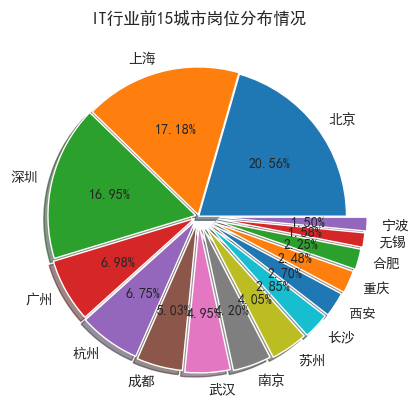

In [183]:
whole_city_list = gb_city
whole_city_list = whole_city_list.sort_values(ascending = False)
whole_city_list = whole_city_list.index
gb_city = gb_city.sort_values(ascending = False)
gb_city = gb_city[:15]
plt.pie(gb_city, labels = gb_city.index,autopct = '%0.2f%%',
       explode = [j*0.01 for j in range(0, len(gb_city))],
        shadow = True
       )
plt.title('IT行业前15城市岗位分布情况')
#IT行业前15城市岗位分布情况

In [184]:
data['月薪(元)'] = 0
for i in range(0, len(data)):
    j = data['薪资区间'][i]
    lst = regex.findall(r'(\d+)-(\d+).*', j)
#     print(j)
    if(len(lst) >= 1):
        salary = (int(lst[0][0]) + int(lst[0][1])) / 2
    else:
        salary = 0
    if('薪' in j and salary > 0):
        months = int(regex.findall(r'.+(\d\d)薪', j)[0])
        salary = salary * months / 12
    salary = int(salary * 1000)
    data['月薪(元)'][i] = salary
#月薪的归一化

C:\Users\SakuraRyo\AppData\Local\Temp\ipykernel_42788\3766926663.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['月薪(元)'][i] = salary


In [185]:
data[data['月薪(元)'] == 0] = data['月薪(元)'].mean()
#把面谈工资的月薪设定为均值

In [186]:
city_salary = data.groupby('工作地点').mean()
#统计各地平均月薪

In [187]:
city_salary = city_salary['月薪(元)']
city_salary = city_salary.sort_values(ascending = False)

In [188]:
for i in range(0, len(city_salary)):
    if(type(city_salary.index[i]) != type('test')):
        city_salary = city_salary.drop(city_salary.index[i])
#清洗异常值

IndexError: index 70 is out of bounds for axis 0 with size 70

In [189]:
def add_value_label(x_list, y_list):
    for i in range(0, len(x_list)):
        plt.text(i, round(y_list[i], 2), round(y_list[i], 2))
#这是给每个条柱赋值的字段

Text(0.5, 1.0, '各城市薪资排名')

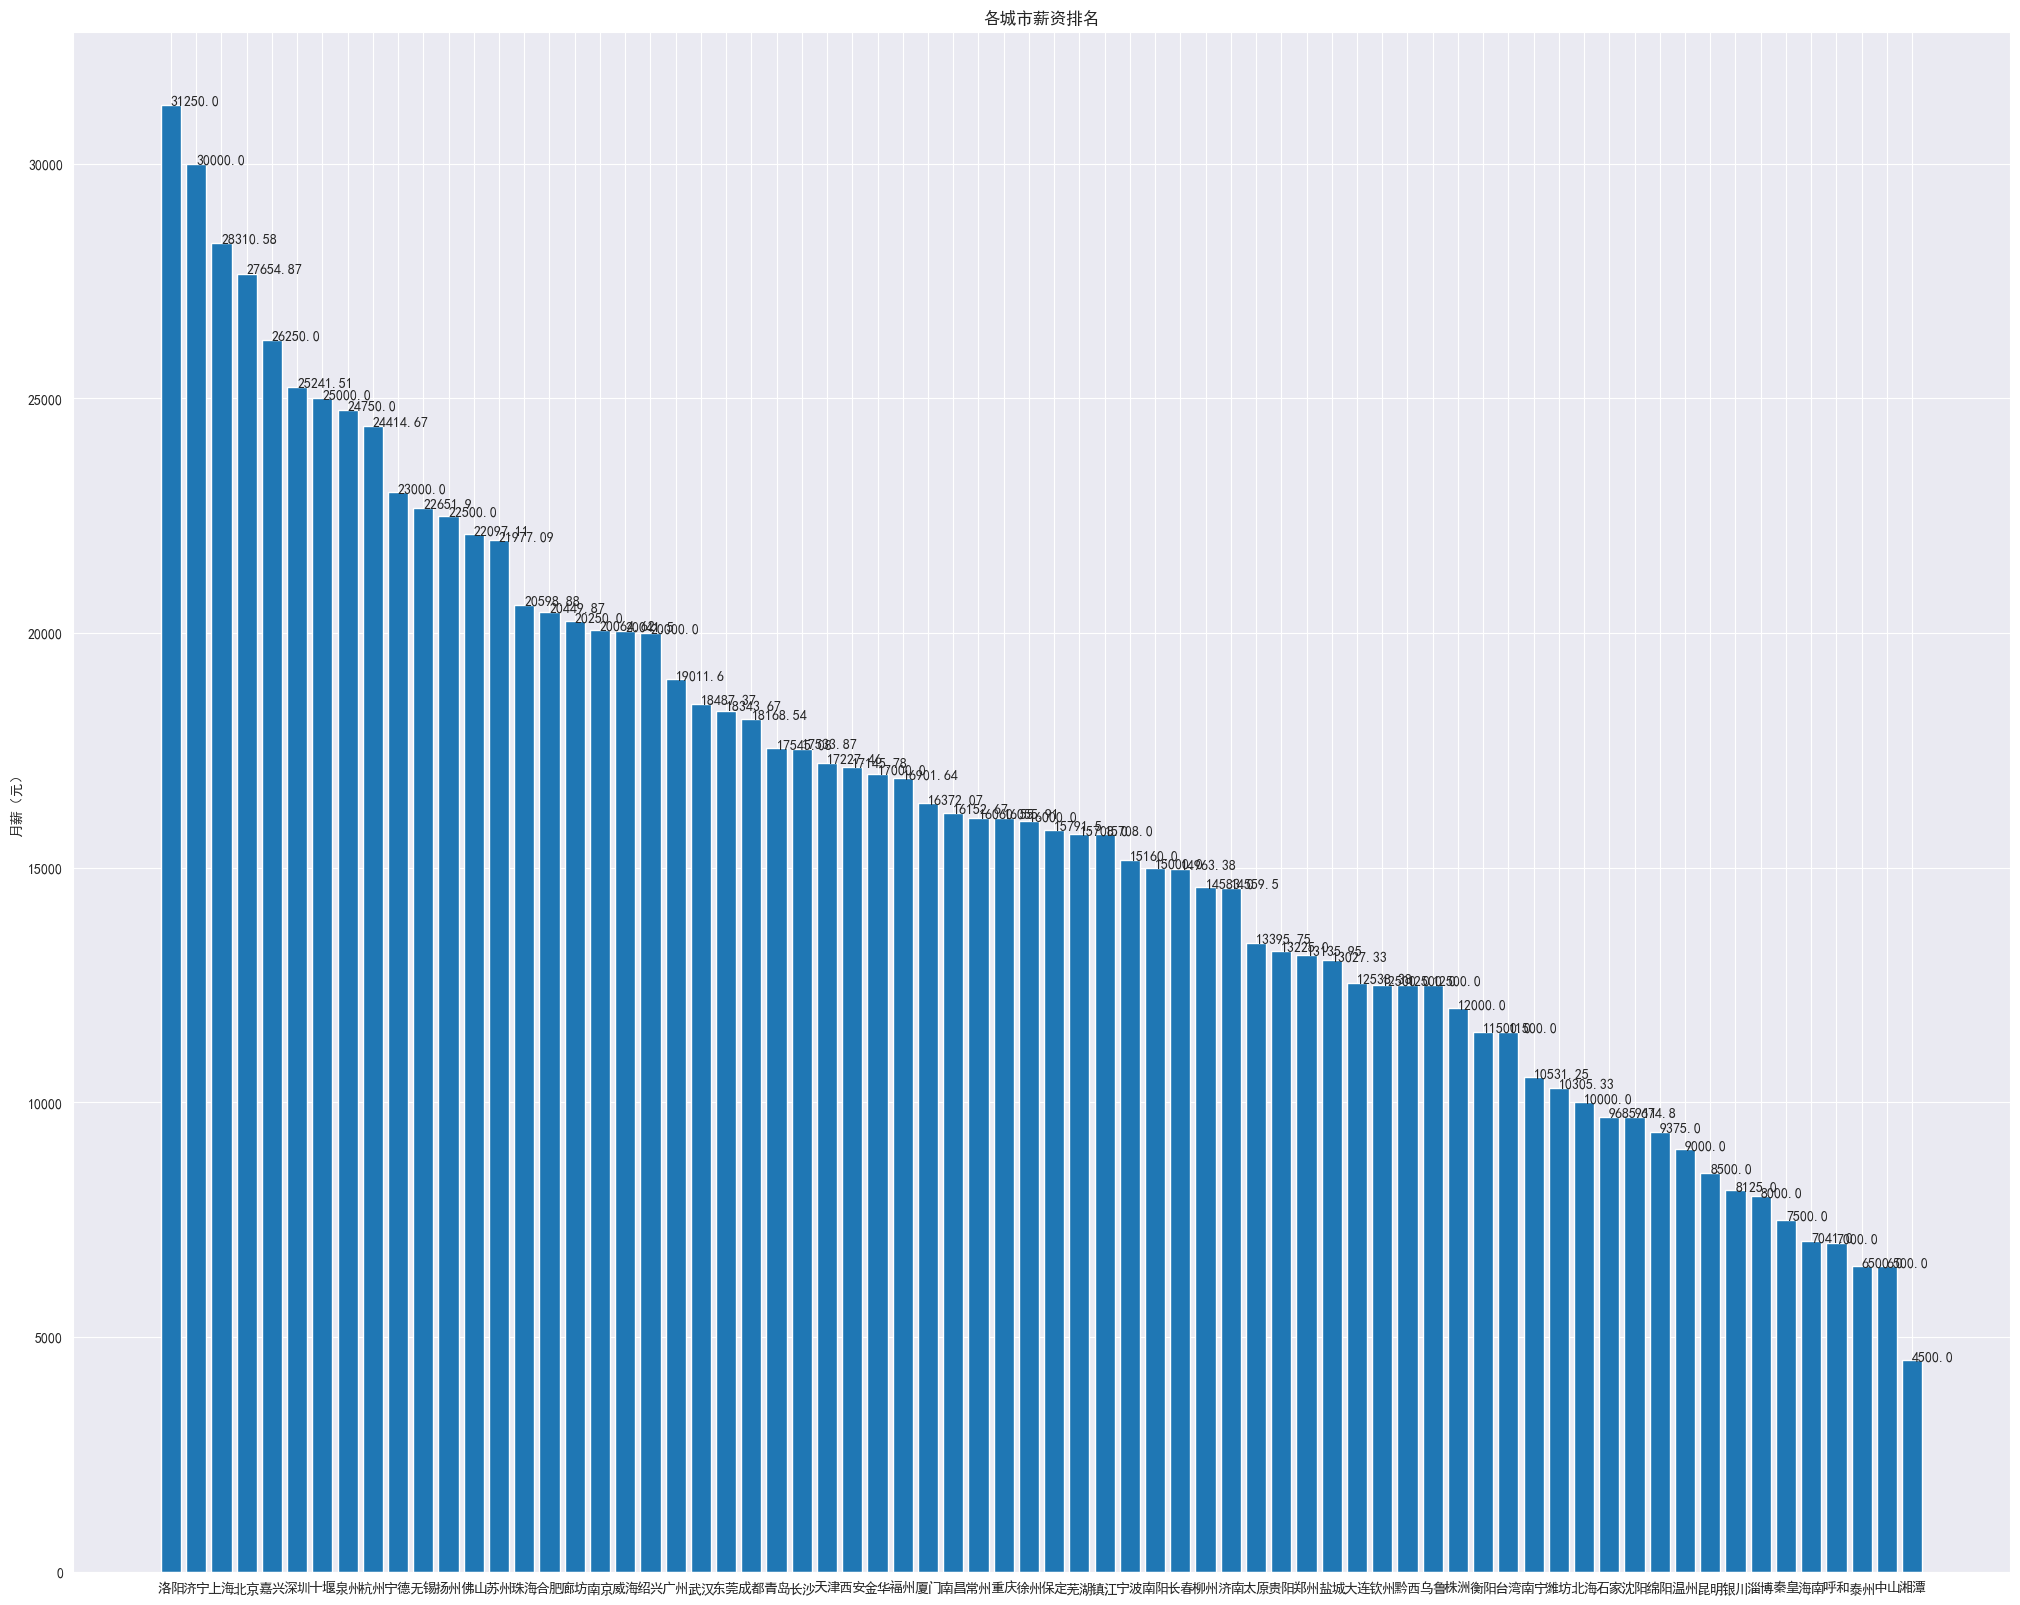

In [190]:
plt.figure(figsize=(25, 20)) #画布大小
plt.bar(city_salary.index, city_salary)
plt.ylabel('月薪（元）')
add_value_label(city_salary.index, city_salary)
plt.title('各城市薪资排名')
#绘制各城市薪资排名

In [164]:
degree_salary = data.groupby('学历要求').mean()
#统计各学历层次月薪

In [209]:
for i in range(0, len(degree_salary)):
    if(type(degree_salary.index[i]) != type('test')):
        degree_salary = degree_salary.drop(degree_salary.index[i])

In [47]:
degree_salary = degree_salary['月薪(元)'].sort_values(ascending = False)
# for i in range(0, len(degree_salary)):
#     if(type(degree_salary.index[i]) != type('test')):
#         degree_salary = degree_salary.drop(degree_salary.index[i])

In [48]:
degree_salary = round(degree_salary, 2)
degree_salary

学历要求
博士       41822.50
硕士       30065.56
本科       22131.99
学历不限     19443.83
大专       15009.59
中专/中技     6500.00
Name: 月薪(元), dtype: float64

Text(0.5, 1.0, '各学历层次平均月薪')

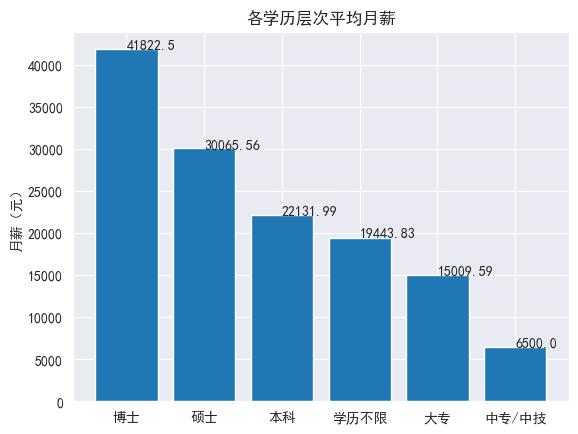

In [111]:
plt.ylabel('月薪（元）')
plt.bar(degree_salary.index, degree_salary)
add_value_label(degree_salary.index, degree_salary)
plt.title('各学历层次平均月薪')

In [50]:
city_list = gb_city.index
data_city = data[data['工作地点'] == '北京']
for i in range(1, len(city_list)):
    data_city = pd.concat([data_city, data[data['工作地点'] == city_list[i]]])

In [51]:
data_degree = []
data_degree.append(data_city[data_city['学历要求'] == '本科'])
data_degree.append(data_city[data_city['学历要求'] == '硕士'])
data_degree.append(data_city[data_city['学历要求'] == '大专'])
data_degree.append(data_city[data_city['学历要求'] == '学历不限'])
data_degree.append(data_city[data_city['学历要求'] == '中专/中技'])
data_degree.append(data_city[data_city['学历要求'] == '博士'])

In [52]:
for i in range(0, len(data_degree)):
    data_degree[i] = data_degree[i].groupby('工作地点').count()['信息ID']
    data_degree[i] = data_degree[i].reindex(city_list, fill_value = 0)

Text(0.5, 1.0, '各主要城市招聘信息学历要求分布')

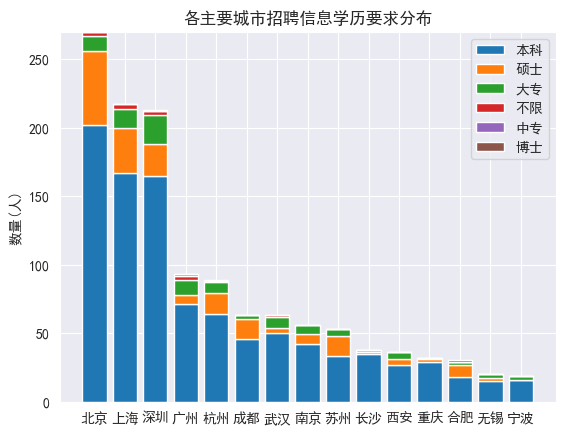

In [115]:
bottom = data_degree[0]
plt.bar(data_degree[0].index, data_degree[0], label = ['本科', '硕士', '大专', '不限', '中专', '博士'][0])
plt.ylabel('数量(人)')
for i in range(1, 6):
    plt.bar(data_degree[i].index, data_degree[i], bottom = bottom, label = ['本科', '硕士', '大专', '不限', '中专', '博士'][i])
    bottom = bottom + data_degree[i]
plt.legend()
plt.title('各主要城市招聘信息学历要求分布')

#绘制各主要城市招聘信息学历要求分布

In [82]:
whole_city_list

Index(['北京', '上海', '深圳', '广州', '杭州', '成都', '武汉', '南京', '苏州', '长沙', '西安', '重庆',
       '合肥', '无锡', '宁波', '郑州', '厦门', '福州', '济南', '青岛', '大连', '天津', '东莞', '常州',
       '佛山', '石家', '珠海', '长春', '徐州', '南昌', '芜湖', '沈阳', '贵阳', '南宁', '太原', '潍坊',
       '廊坊', '盐城', '泉州', '济宁', '黔西', '金华', '银川', '保定', '宁德', '威海', '嘉兴', '秦皇',
       '钦州', '衡阳', '绍兴', '绵阳', '镇江', '北海', '湘潭', '温州', '中山', '淄博', '海南', '洛阳',
       '十堰', '株洲', '柳州', '乌鲁', '昆明', '扬州', '呼和', '台湾', '南阳', '泰州'],
      dtype='object', name='工作地点')

In [83]:
whole_city_list
colors_hash = dict()
for i in range(0, len(whole_city_list)):
    j = int(i / (len(whole_city_list) / 5))
    hash_ = ['#ff0000', '#ff5500', '#ff9900', '#ffBB00', '#ffff00']
    colors_hash.update({whole_city_list[i]:hash_[j]})
    
#颜色的前置准备

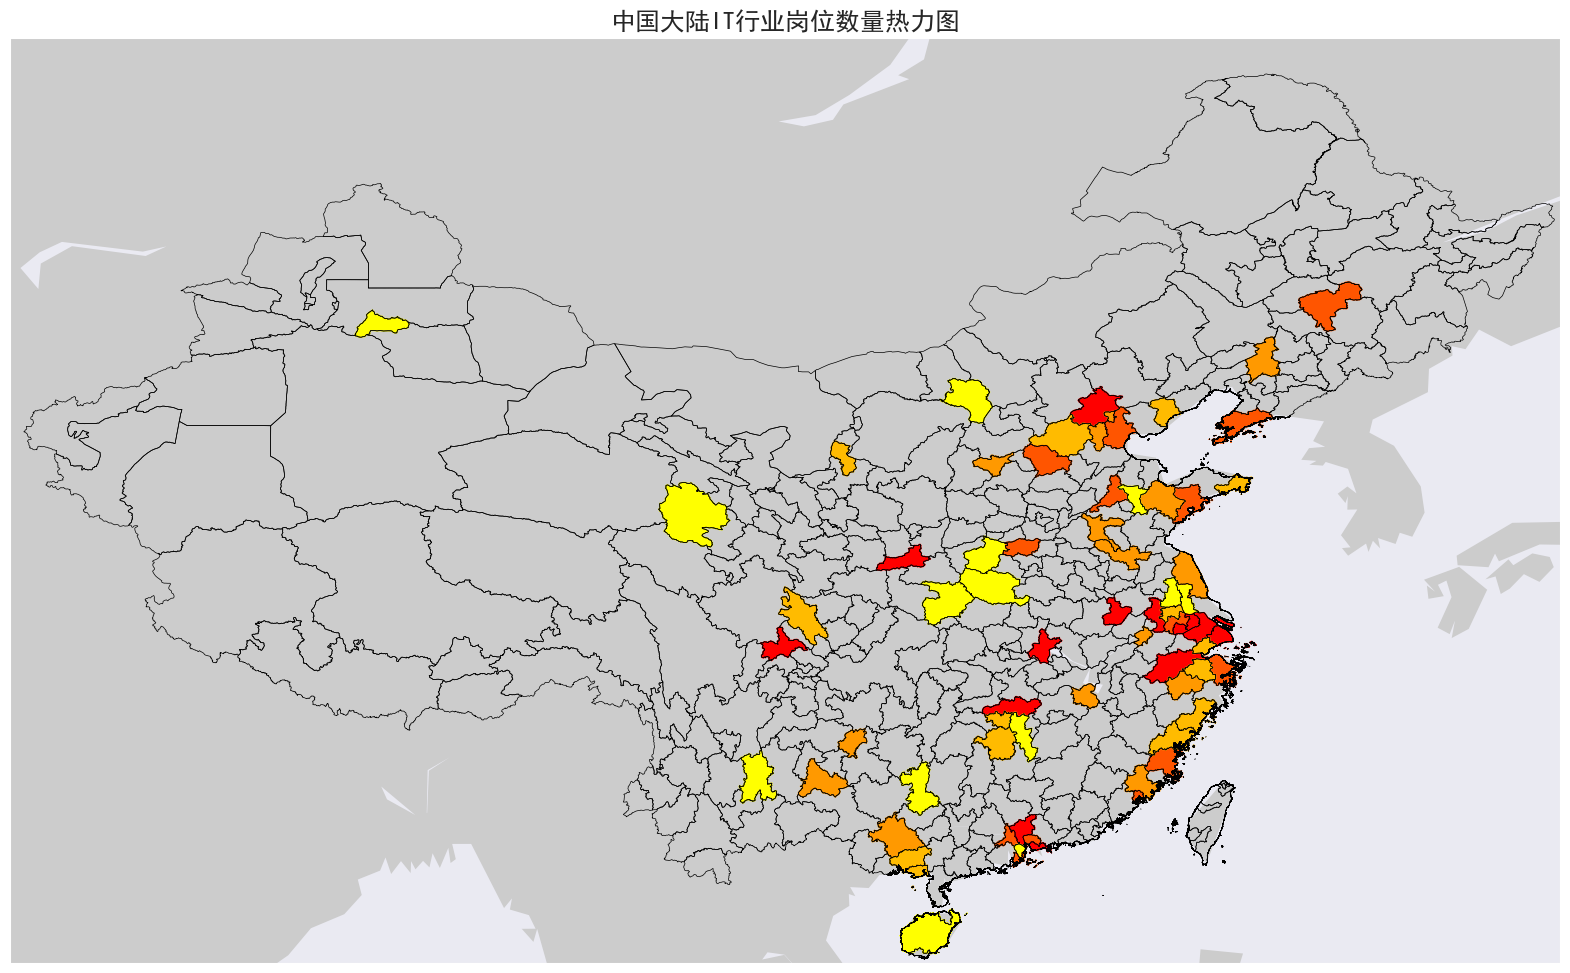

In [85]:
plt.figure(figsize=(20, 15))
map = Basemap(llcrnrlon=73, llcrnrlat=18, urcrnrlon=135, urcrnrlat=55)
map.fillcontinents()
map.readshapefile('gadm36_TWN_1', 'states', drawbounds = True)
map.readshapefile('gadm36_CHN_2', 'states', drawbounds = True)

map_city_list = map.states_info
map_city_list_2 = []
already = []
count = 0

colors_2 = []
for i in map_city_list:
    if i['NL_NAME_2'] in whole_city_list:
        map_city_list_2.append(count)
        colors_2.append(colors_hash[i['NL_NAME_2']])
    if i['NL_NAME_2'][:2] in whole_city_list:
        map_city_list_2.append(count)
        k = i['NL_NAME_2'][:2]
        colors_2.append(colors_hash[k])
    count = count + 1

ax = plt.gca()
for i in range(0, len(map_city_list_2)):
    j = map_city_list_2[i]
    color = rgb2hex(colors_2[i])
    poly = Polygon(map.states[j], facecolor=color, edgecolor=color) 
    ax.add_patch(poly)


ax.set_title(label='中国大陆IT行业岗位数量热力图',
             fontdict={'fontsize':18}
            )
plt.show()
#绘制中国大陆IT行业岗位数量热力图

In [154]:
city_salary_list = city_salary.index

In [94]:
city_salary_list
colors_hash = dict()
for i in range(0, len(city_salary_list)):
    j = int(i / (len(city_salary_list) / 5))
    hash_ = ['#ff0000', '#ff5500', '#ff9900', '#ffBB00', '#ffff00']
    colors_hash.update({city_salary_list[i]:hash_[j]})
    
#颜色的前置准备

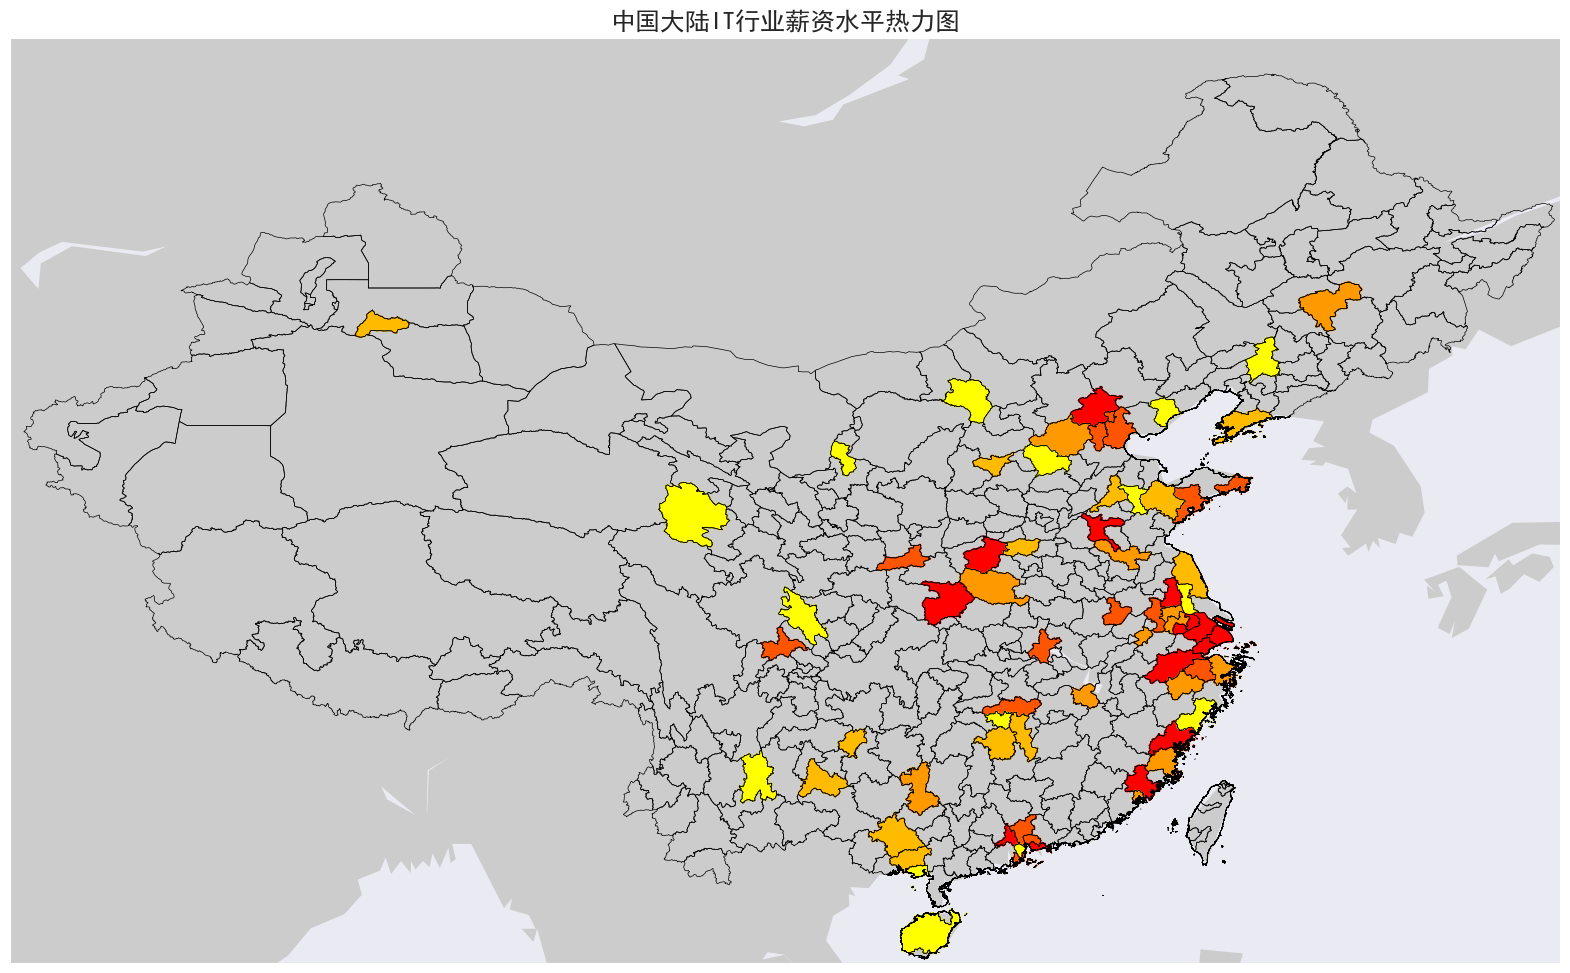

In [97]:
plt.figure(figsize=(20, 15))
map = Basemap(llcrnrlon=73, llcrnrlat=18, urcrnrlon=135, urcrnrlat=55)
map.fillcontinents()
map.readshapefile('gadm36_TWN_1', 'states', drawbounds = True)
map.readshapefile('gadm36_CHN_2', 'states', drawbounds = True)

map_city_list = map.states_info
map_city_list_2 = []
already = []
count = 0

# colors = {s:cmap(np.sqrt((GDP[s] - GDP.min()) / (GDP.max() - GDP.min())))[:3]
#           for s in GDP.index}

colors_2 = []
for i in map_city_list:
    if i['NL_NAME_2'] in whole_city_list:
        map_city_list_2.append(count)
        colors_2.append(colors_hash[i['NL_NAME_2']])
    if i['NL_NAME_2'][:2] in whole_city_list:
        map_city_list_2.append(count)
        k = i['NL_NAME_2'][:2]
        colors_2.append(colors_hash[k])
    count = count + 1

ax = plt.gca()
for i in range(0, len(map_city_list_2)):
    j = map_city_list_2[i]
    color = rgb2hex(colors_2[i])
    poly = Polygon(map.states[j], facecolor=color, edgecolor=color) 
    ax.add_patch(poly)


ax.set_title(label='中国大陆IT行业薪资水平热力图',
             fontdict={'fontsize':18}
            )

#导入地图文件
plt.show()

#地图热力图绘制

In [191]:
data_corr = data
data_corr['学历归一'] = 0
data_corr['经验归一'] = 0
data_corr['城市归一'] = 0

data_corr.loc[data['学历要求'] == '学历不限', '学历归一'] = 1
data_corr.loc[data['学历要求'] == '中专/中技', '学历归一'] = 2.5
data_corr.loc[data['学历要求'] == '大专', '学历归一'] = 4
data_corr.loc[data['学历要求'] == '本科', '学历归一'] = 6
data_corr.loc[data['学历要求'] == '硕士', '学历归一'] = 8
data_corr.loc[data['学历要求'] == '博士', '学历归一'] = 10

data_corr.loc[data['工作经验'] == '经验不限', '经验归一'] = 2.5
data_corr.loc[data['工作经验'] == '1-3年', '经验归一'] = 5
data_corr.loc[data['工作经验'] == '3-5年', '经验归一'] = 7.5
data_corr.loc[data['工作经验'] == '5-10年', '经验归一'] = 10

for i in range(0, len(city_salary_list)):
    j = 10 - (int(i / (len(city_salary_list) / 10)))
    data_corr.loc[data['工作地点'] == city_salary_list[i], '城市归一'] = j

In [205]:
data_corr = data_corr.drop(axis=1, columns='信息ID')

In [206]:
aaa = data_corr.corr()

In [201]:
aaa =aaa.drop(axis=1, columns='信息ID')

Text(0.5, 1.0, '各因素间关系的热力图')

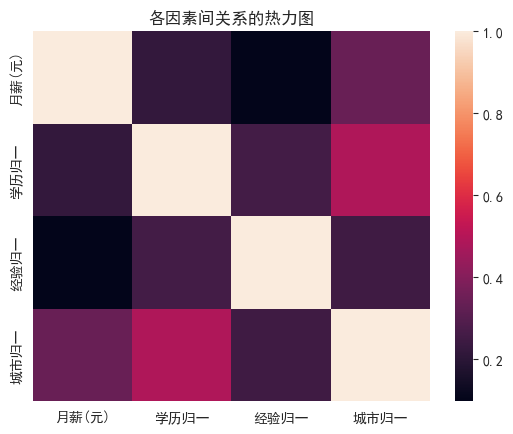

In [208]:
sns.heatmap(aaa)
plt.title('各因素间关系的热力图')